In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('data.csv')
df

,sample_name,result,confindr.contam_status.metric_value,confindr.contam_status.check_result,confindr.percentage_contamination.metric_value,confindr.percentage_contamination.check_result,quast.# contigs (>= 1000 bp).metric_value,quast.# contigs (>= 1000 bp).check_result,quast.N50.metric_value,quast.N50.check_result,quast.Total length (>= 1000 bp).metric_value,quast.Total length (>= 1000 bp).check_result
0,G18000072,FAILURE,True,FAILURE,29.87,FAILURE,309,FAILURE,119306,PASS,12143060,WARNING
1,G18000894,FAILURE,True,FAILURE,14.15,FAILURE,737,FAILURE,118583,PASS,12096422,WARNING
2,G18001238,PASS,False,PASS,0.00,PASS,81,PASS,238107,PASS,6992649,PASS
3,G18001244,PASS,False,PASS,0.00,PASS,100,PASS,271864,PASS,7262085,PASS
4,G18001246,PASS,False,PASS,0.00,PASS,82,PASS,299115,PASS,7015263,PASS
...,...,...,...,...,...,...,...,...,...,...,...,...
995,G20000694,PASS,False,PASS,0.00,PASS,33,PASS,562553,PASS,6742106,PASS
996,G20000695,FAILURE,True,FAILURE,23.25,FAILURE,1548,FAILURE,393323,PASS,10820712,WARNING
997,G20000696,PASS,False,PASS,0.00,PASS,22,PASS,542419,PASS,6515031,PASS
998,G20000697,PASS,False,PASS,0.00,PASS,59,PASS,351608,PASS,7158400,PASS


### Question 1

In [3]:
q1 = df[(df['confindr.contam_status.check_result'] == 'FAILURE') & (df['confindr.percentage_contamination.metric_value'] > 0.05)]
q1.shape[0]

57

### Question 2

In [4]:
q2 = df[(df['quast.# contigs (>= 1000 bp).metric_value'] <= 50) & (df['quast.N50.metric_value'] >= 750000)]
q2.shape[0]

49

### Question 3

In [32]:
num_col = df.select_dtypes(include='number').columns.tolist()

#remove the suffix quast. from all numerical columns
cols = []
for col in num_col:
    if col[:6] == "quast.":
        col = col[6:]
    cols.append(col)

#remove the prefix .metric_value from all numerical columns
num_cols = []
for col in cols: 
    if col[-13:] == ".metric_value":
        col = col[:-13]
    num_cols.append(col)
    
#replace 'confindr.percentage_contamination' with 'contamination_percent'
num_cols[0] = 'contamination_percent'



#rename all the columns names in the dataframe with the corrected names
col_dict = {}
for key,value in zip(num_col, num_cols):
    col_dict[key] = value
    
df = df.rename(columns=col_dict)
df.head()

,sample_name,result,confindr.contam_status.metric_value,confindr.contam_status.check_result,contamination_percent,confindr.percentage_contamination.check_result,# contigs (>= 1000 bp),quast.# contigs (>= 1000 bp).check_result,N50,quast.N50.check_result,Total length (>= 1000 bp),quast.Total length (>= 1000 bp).check_result
0,G18000072,FAILURE,True,FAILURE,29.87,FAILURE,309,FAILURE,119306,PASS,12143060,WARNING
1,G18000894,FAILURE,True,FAILURE,14.15,FAILURE,737,FAILURE,118583,PASS,12096422,WARNING
2,G18001238,PASS,False,PASS,0.00,PASS,81,PASS,238107,PASS,6992649,PASS
3,G18001244,PASS,False,PASS,0.00,PASS,100,PASS,271864,PASS,7262085,PASS
4,G18001246,PASS,False,PASS,0.00,PASS,82,PASS,299115,PASS,7015263,PASS


In [41]:
new_df = df[["contamination_percent", "# contigs (>= 1000 bp)", "N50", "Total length (>= 1000 bp)"]]
new_df.head()

,contamination_percent,# contigs (>= 1000 bp),N50,Total length (>= 1000 bp)
0,29.87,309,119306,12143060
1,14.15,737,118583,12096422
2,0.00,81,238107,6992649
3,0.00,100,271864,7262085
4,0.00,82,299115,7015263


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000739151F948>,
      dtype=object)

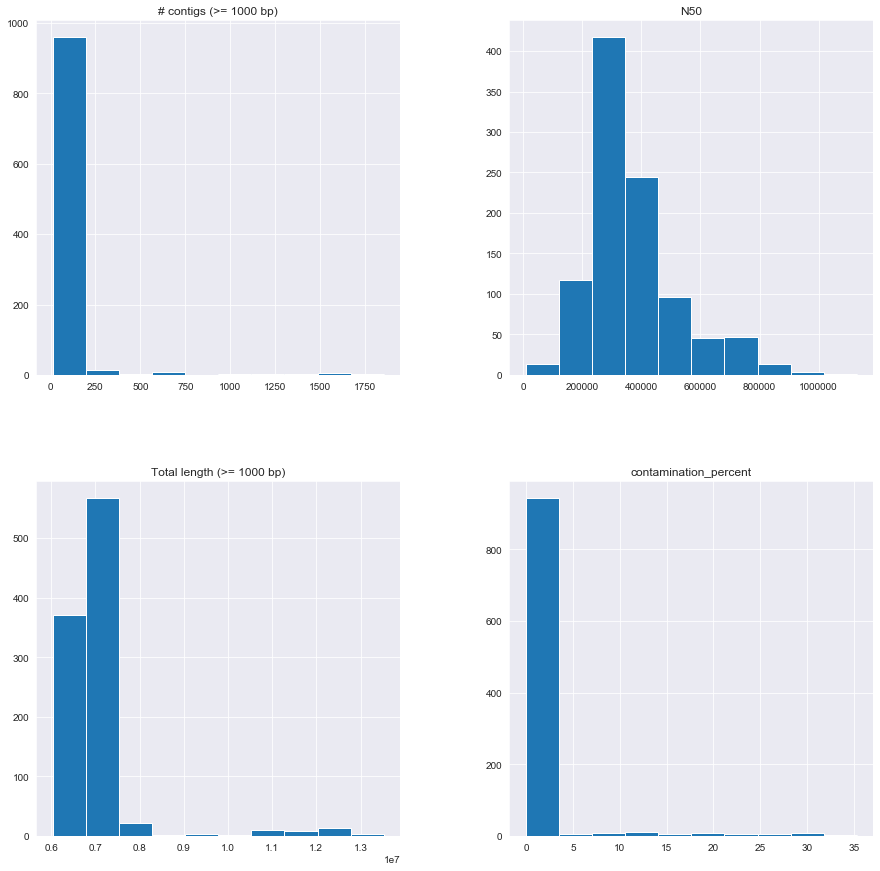

In [50]:
new_df.hist(figsize = (15,15), alpha = 1)

### Question 4

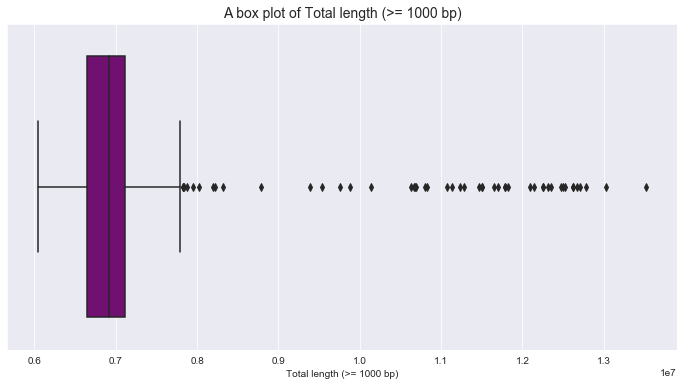

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data=df, x='Total length (>= 1000 bp)', color = "purple")
plt.title("A box plot of Total length (>= 1000 bp)", fontsize=14);

### Question 6

In [88]:
new_df = df[["contamination_percent", "# contigs (>= 1000 bp)", "N50", "Total length (>= 1000 bp)"]]
new_df.head(20)

,contamination_percent,# contigs (>= 1000 bp),N50,Total length (>= 1000 bp)
0,29.87,309,119306,12143060
1,14.15,737,118583,12096422
2,0.00,81,238107,6992649
3,0.00,100,271864,7262085
4,0.00,82,299115,7015263
5,0.00,23,699713,6408294
6,0.00,61,293593,7083728
7,0.00,56,395978,6734126
8,0.00,64,267306,7096055
9,0.00,66,272690,6800632


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007391592E48>,
      dtype=object)

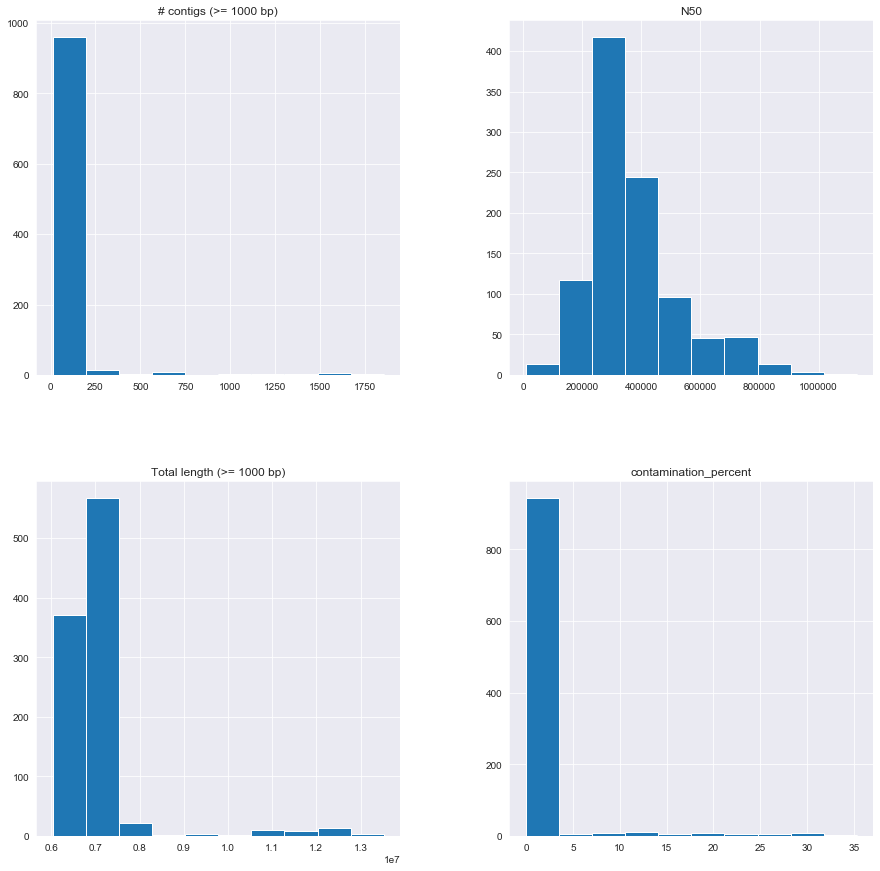

In [51]:
new_df.hist(figsize = (15,15), alpha = 1)

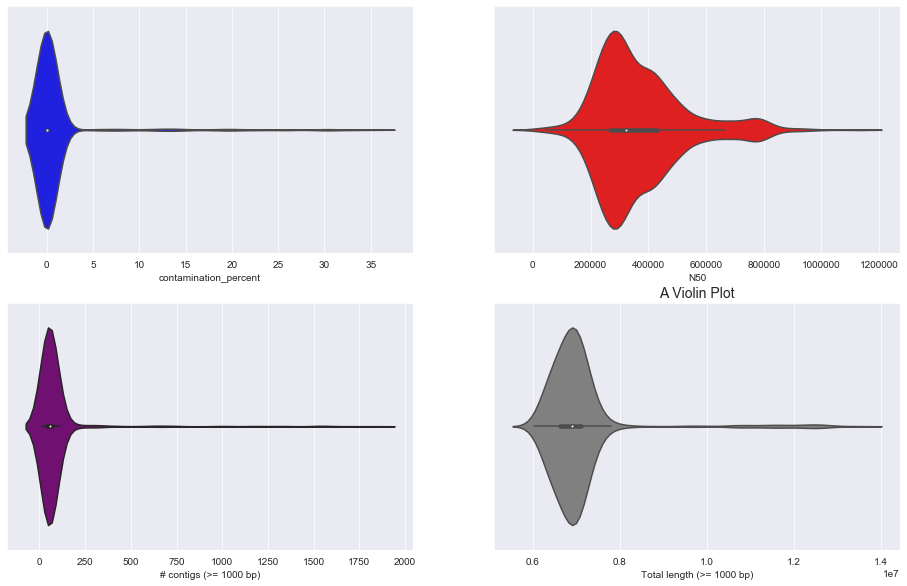

In [140]:
df.select_dtypes(include='number')

plt.figure(figsize = [16, 10])

plt.subplot(2, 2, 1)
sns.violinplot(data=df1, x="contamination_percent", color = "blue")

plt.subplot(2, 2, 2)
sns.violinplot(data=df1, x="N50", color = "red");

plt.subplot(2, 2, 3)
sns.violinplot(data=df1, x="# contigs (>= 1000 bp)", color = "purple");

plt.subplot(2, 2, 4)
sns.violinplot(data=df1, x="Total length (>= 1000 bp)", color = "grey");


AttributeError: 'PathCollection' object has no property 'legend'

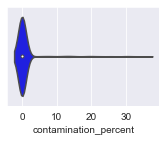

In [76]:
plt.subplot(2, 2, 1)
sns.violinplot(data=df1, x="contamination_percent", color = "blue")
sns.swarmplot(data=df1, x="contamination_percent", color = "blue", dodge = True, legend= 'false', ax =ax)

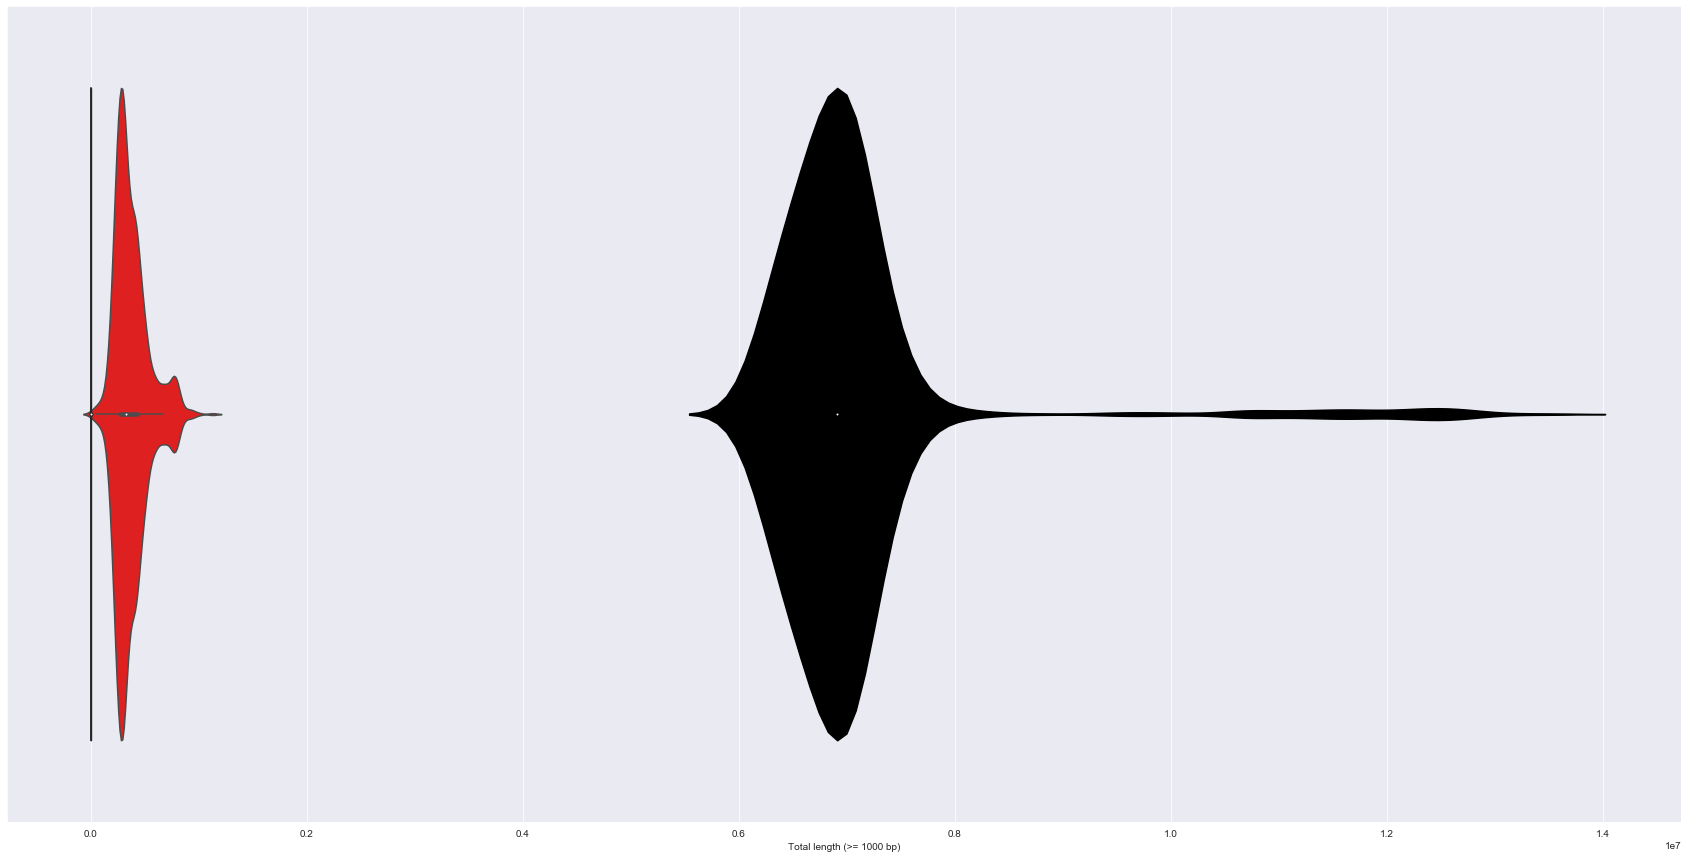

In [84]:
fig, ax = plt.subplots(figsize = (30, 15))
ax = sns.violinplot(data=df1, x="contamination_percent", color = "blue")
ax = sns.violinplot(data=df1, x="N50", color = "red")
ax = sns.violinplot(data=df1, x="# contigs (>= 1000 bp)", color = "purple")
ax = sns.violinplot(data=df1, x="Total length (>= 1000 bp)", color = "black")
plt.show()

In [120]:
df.head(5)

,sample_name,result,confindr.contam_status.metric_value,confindr.contam_status.check_result,contamination_percent,confindr.percentage_contamination.check_result,# contigs (>= 1000 bp),quast.# contigs (>= 1000 bp).check_result,N50,quast.N50.check_result,Total length (>= 1000 bp),quast.Total length (>= 1000 bp).check_result
0,G18000072,FAILURE,True,FAILURE,29.87,FAILURE,309,FAILURE,119306,PASS,12143060,WARNING
1,G18000894,FAILURE,True,FAILURE,14.15,FAILURE,737,FAILURE,118583,PASS,12096422,WARNING
2,G18001238,PASS,False,PASS,0.00,PASS,81,PASS,238107,PASS,6992649,PASS
3,G18001244,PASS,False,PASS,0.00,PASS,100,PASS,271864,PASS,7262085,PASS
4,G18001246,PASS,False,PASS,0.00,PASS,82,PASS,299115,PASS,7015263,PASS


In [85]:
import numpy as np

In [119]:
new_df.head()

,contamination_percent,# contigs (>= 1000 bp),N50,Total length (>= 1000 bp)
0,29.87,309,119306,12143060
1,14.15,737,118583,12096422
2,0.00,81,238107,6992649
3,0.00,100,271864,7262085
4,0.00,82,299115,7015263


In [139]:
transformed_data = pd.pivot_table(df, index = "sample_name", columns = "confindr.contam_status.metric_value")
transformed_data

# contigs (>= 1000 bp)               N50  \
confindr.contam_status.metric_value                  False   True      False   
sample_name                                                                    
G18000072                                              NaN   309.0       NaN   
G18000894                                              NaN   737.0       NaN   
G18001238                                             81.0     NaN  238107.0   
G18001244                                            100.0     NaN  271864.0   
G18001246                                             82.0     NaN  299115.0   
...                                                    ...     ...       ...   
G20000694                                             33.0     NaN  562553.0   
G20000695                                              NaN  1548.0       NaN   
G20000696                                             22.0     NaN  542419.0   
G20000697                                             59.0     NaN  351608.0   
G20000698                                             36.0     NaN  579259.0   

                                              Total length (>= 1000 bp)  \
confindr.contam_status.metric_value     True                      False   
sample_name                                                               
G18000072                            119306.0                       NaN   
G18000894                            118583.0                       NaN   
G18001238                                 NaN                 6992649.0   
G18001244                                 NaN                 7262085.0   
G18001246                                 NaN                 7015263.0   
...                                       ...                       ...   
G20000694                                 NaN                 6742106.0   
G20000695                            393323.0                       NaN   
G20000696                                 NaN                 6515031.0   
G20000697                                 NaN                 7158400.0   
G20000698                                 NaN                 6889218.0   

                                                contamination_percent         
confindr.contam_status.metric_value       True                  False  True   
sample_name                                                                   
G18000072                            12143060.0                   NaN  29.87  
G18000894                            12096422.0                   NaN  14.15  
G18001238                                   NaN                   0.0    NaN  
G18001244                                   NaN                   0.0    NaN  
G18001246                                   NaN                   0.0    NaN  
...                                         ...                   ...    ...  
G20000694                                   NaN                   0.0    NaN  
G20000695                            10820712.0                   NaN  23.25  
G20000696                                   NaN                   0.0    NaN  
G20000697                                   NaN                   0.0    NaN  
G20000698                                   NaN                   0.0    NaN  

[1000 rows x 8 columns]

In [135]:
df.describe()

,contamination_percent,# contigs (>= 1000 bp),N50,Total length (>= 1000 bp)
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,0.995130,85.113000,3.699295e+05,7.048074e+06
std,4.539366,176.450761,1.566606e+05,9.933365e+05
min,0.000000,13.000000,8.773000e+03,6.039230e+06
25%,0.000000,39.000000,2.672050e+05,6.640009e+06
50%,0.000000,56.000000,3.236910e+05,6.912588e+06
75%,0.000000,69.000000,4.297192e+05,7.108420e+06
max,35.300000,1854.000000,1.129372e+06,1.352326e+07
